In [43]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(font='Liberation Serif',
              rc={'figure.figsize': (7.5,3.75),
                  'font.size': 11,
                  'figure.dpi': 300,
                 })

In [4]:
DATA = Path.cwd().parent / 'data'
SUMM_FOLDER = DATA / 'summaries_finetune'
TEXT_FILES = SUMM_FOLDER / 'text_files_copy'
SOURCE_TEXTS = SUMM_FOLDER / 'source_texts'

In [5]:
summaries_df = pd.read_csv(SUMM_FOLDER / 'final_summaries_ai_aloe_fixed.csv')

In [13]:
summaries_df['word_count'] = summaries_df['text'].apply(lambda x: len(x.split()))

In [23]:
summaries_df

,Unnamed: 0.1,Unnamed: 0,Row.names,filename,filename_clean,source_text,Main.Point,Details,Cohesion,Objective.Language,Wording.Para,Lang..Bey..ST,Summ..Length,content_pca,paraphrase_pca,text,source_text_clean,source_text_filename_clean,source,word_count
0,0,1,1,1091_CivilServices .txt,1091_CivilServices,CivilService.txt,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.37,0.785,hard work pays off / / \n,CivilService,11_CivilService,\nCivil service offers jobs to thousands of me...,6
1,1,2,10,455436_Hybrids .txt,455436_Hybrids,Hybrids.txt,0.5,0.5,0.5,0.5,0.0,0.5,0.5,1.37,0.245,There will be a more petroleum product coming...,Hybrids,24_Hybrids,\nGasoline prices are getting higher and highe...,26
2,2,3,100,355927_SexDetermination .txt,355927_SexDetermination,Sex Determination.txt,1.0,2.0,3.0,1.5,0.5,1.0,1.0,5.60,1.030,Males have one Y chromosome and one X chromoso...,Sex Determination,Sex Determination,Mode of Inheritance: Sex Determination\nRecall...,134
3,3,4,1000,MDSum_A_Sum_037_Text1.txt.txt,MDSum_A_Sum_037_Text1,sun_exposure,2.5,2.0,1.5,2.0,2.5,1.5,1.0,5.42,3.435,Electromagnetic radiation with an energy and s...,sun_exposure,Sun_exposure_Text1,Ultraviolet radiation\n\nUltraviolet radiation...,34
4,4,5,1001,MDSum_A_Sum_037_Text2.txt.txt,MDSum_A_Sum_037_Text2,sun_exposure,2.5,2.0,2.0,2.5,3.0,2.0,1.0,5.86,4.220,It is highly recommended by doctors that peopl...,sun_exposure,Sun_exposure_Text2,Research indicates that sufficient amounts of ...,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,4685,4686,995,MDSum_A_Sum_029_Text2.txt.txt,MDSum_A_Sum_029_Text2,sun_exposure,2.5,2.0,2.5,2.5,1.0,2.0,2.5,6.30,2.060,The results from many studies indicate that vi...,sun_exposure,Sun_exposure_Text2,Research indicates that sufficient amounts of ...,101
4686,4686,4687,996,MDSum_A_Sum_029_Text4.txt.txt,MDSum_A_Sum_029_Text4,sun_exposure,2.5,2.0,3.0,2.0,1.0,2.0,1.5,6.74,2.060,People are being advised to spend less time in...,sun_exposure,Sun_exposure_Text4,The sun counteracts cancer\n\nSunrays that hit...,175
4687,4687,4688,997,MDSum_A_Sum_029_Text5.txt.txt,MDSum_A_Sum_029_Text5,sun_exposure,2.5,2.5,2.0,2.5,1.0,2.0,1.0,6.41,2.060,We are thus in a situation where people are re...,sun_exposure,Sun_exposure_Text5,"Sunbathing causes cancer \n\nBy Alex McFadden,...",237
4688,4688,4689,998,MDSum_A_Sum_031_Text3.txt.txt,MDSum_A_Sum_031_Text3,sun_exposure,2.5,3.0,3.5,2.0,2.5,2.5,3.0,8.28,3.925,"There are two types of cancers, melanoma and b...",sun_exposure,Sun_exposure_Text3,American Cancer Society\n\n \n\nUV radiation a...,60


In [29]:
sns.boxplot(summaries_df[['text', 'content_pca', 'paraphrase_pca']].melt(id_vars='text', value_vars=['content_pca', 'paraphrase_pca']),
           x = 'variable')

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

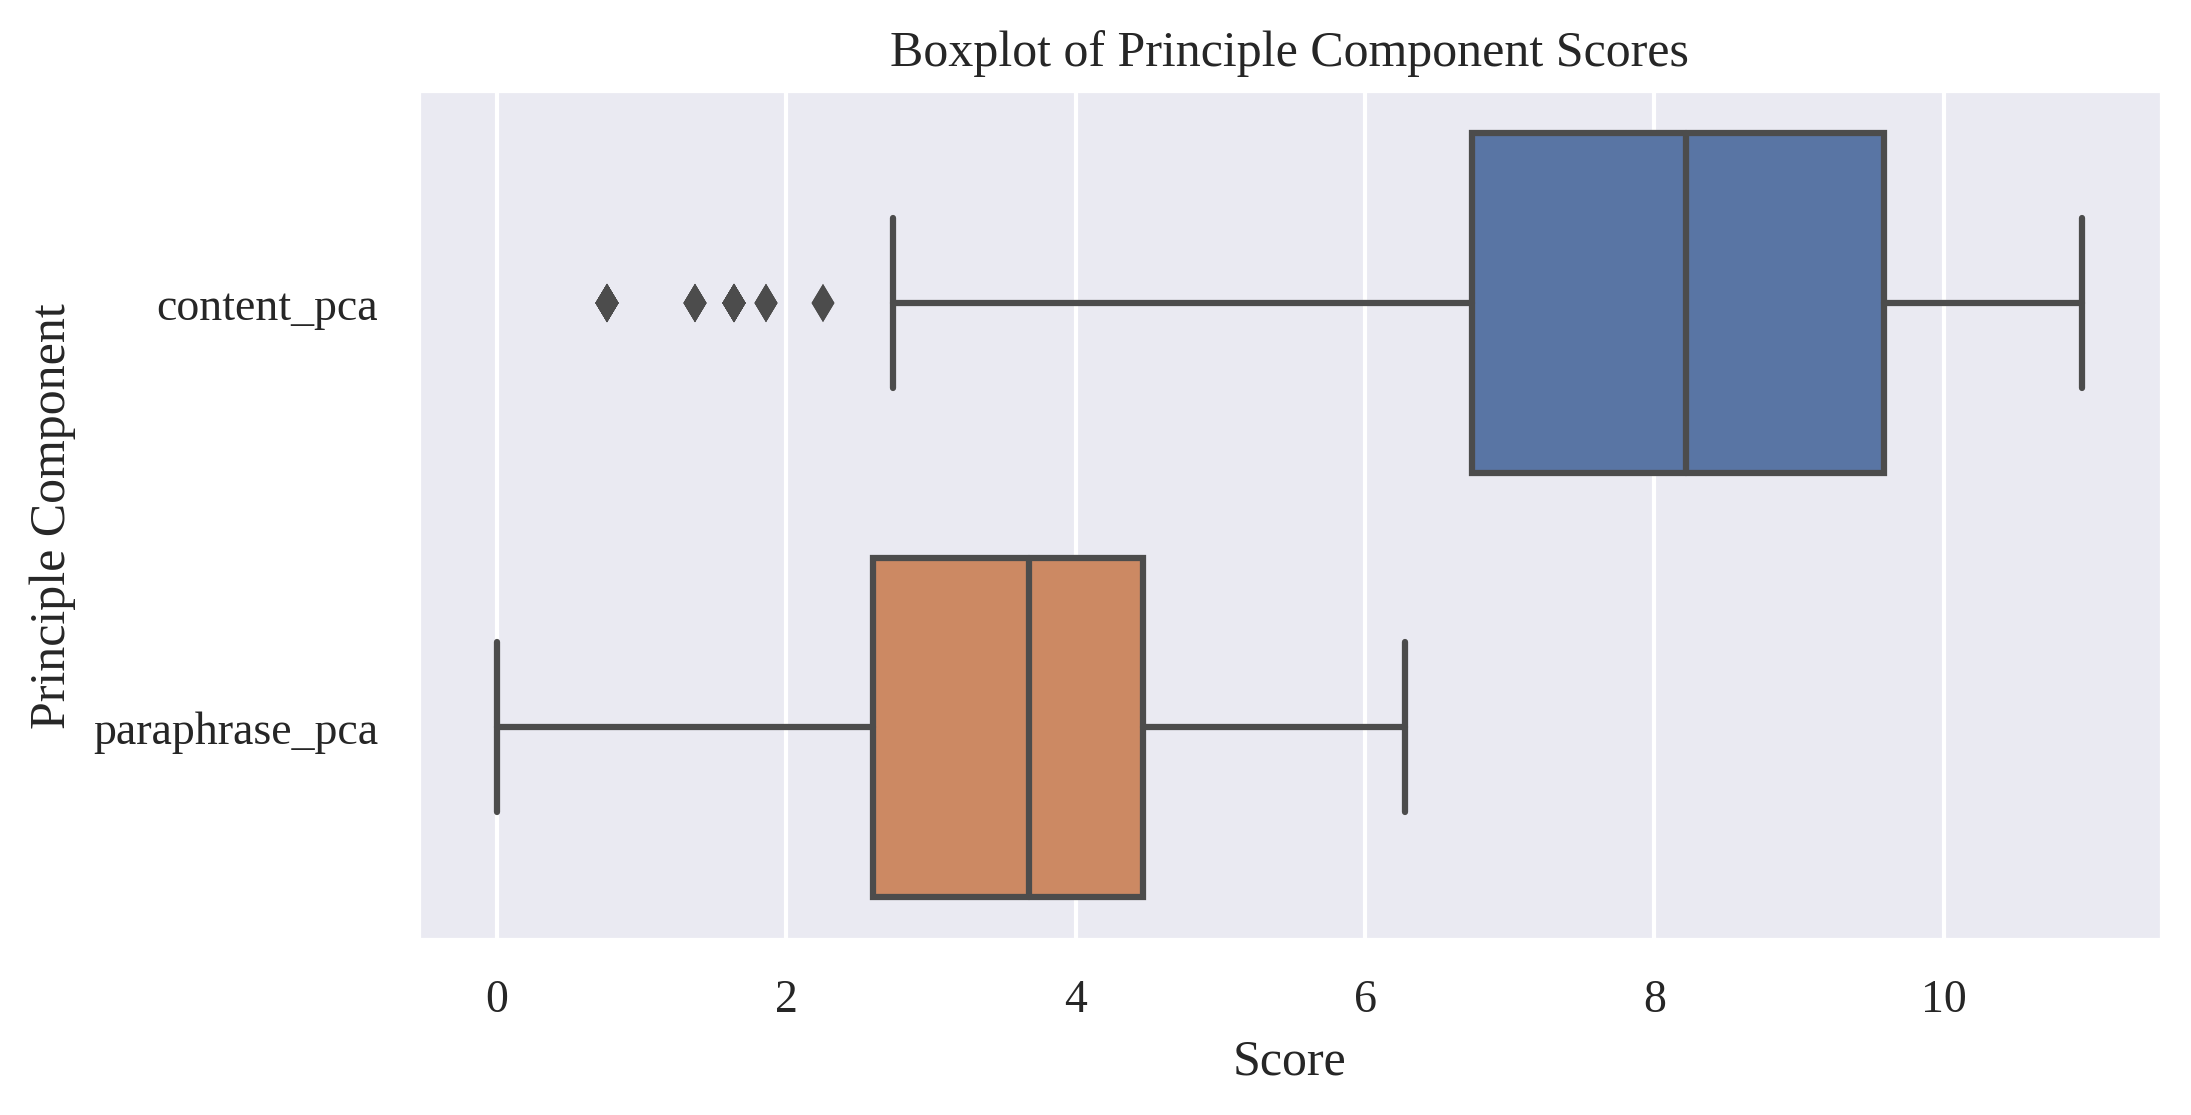

In [44]:
melt = summaries_df[['text', 'content_pca', 'paraphrase_pca']].melt(id_vars='text', value_vars=['content_pca', 'paraphrase_pca'])
sns.boxplot(data=melt, x='value', y = 'variable')

plt.title('Boxplot of Principle Component Scores')
plt.xlabel('Score')
plt.ylabel('Principle Component')
plt.show()

,text,variable,value
0,hard work pays off / / \n,content_pca,1.370
1,There will be a more petroleum product coming...,content_pca,1.370
2,Males have one Y chromosome and one X chromoso...,content_pca,5.600
3,Electromagnetic radiation with an energy and s...,content_pca,5.420
4,It is highly recommended by doctors that peopl...,content_pca,5.860
...,...,...,...
9375,The results from many studies indicate that vi...,paraphrase_pca,2.060
9376,People are being advised to spend less time in...,paraphrase_pca,2.060
9377,We are thus in a situation where people are re...,paraphrase_pca,2.060
9378,"There are two types of cancers, melanoma and b...",paraphrase_pca,3.925
